In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('updated_diamonds.csv')

In [5]:
df.drop('Unnamed: 0',axis =1, inplace=True) #removing column that was basically the same as the index

In [7]:
df.info() #data types are as expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52886 entries, 0 to 52885
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   shape             52886 non-null  object 
 1   original_price    52886 non-null  int64  
 2   discounted_price  6863 non-null   float64
 3   carat             52886 non-null  float64
 4   cut               52886 non-null  object 
 5   color             52886 non-null  object 
 6   clarity           52886 non-null  object 
 7   polish            52886 non-null  object 
 8   symmetry          52886 non-null  object 
 9   fluorescence      52886 non-null  object 
 10  depth             52886 non-null  float64
 11  table             52886 non-null  float64
 12  lxwratio          52886 non-null  float64
 13  culet             52886 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 5.6+ MB


In [60]:
df.describe()

,original_price,discounted_price,carat,depth,table,lxwratio
count,5.288600e+04,6863.000000,52886.000000,52886.000000,52886.000000,52886.000000
mean,7.893047e+03,2738.725922,0.989908,66.094377,62.963559,1.308416
std,2.678801e+04,11058.712330,0.908068,4.521924,5.055616,0.236201
min,2.210000e+02,238.000000,0.230000,51.000000,51.000000,0.790000
25%,7.830000e+02,453.000000,0.400000,62.700000,59.000000,1.050000
50%,2.122000e+03,847.000000,0.710000,66.200000,62.000000,1.350000
75%,6.345000e+03,1794.000000,1.200000,68.900000,66.000000,1.440000
max,2.702260e+06,343853.000000,20.450000,80.000000,85.000000,3.370000


In [44]:
#Astor Ideal and showing up as ealAstor - need to update
df['cut'] = df['cut'].replace('ealAstor','Astor Ideal')

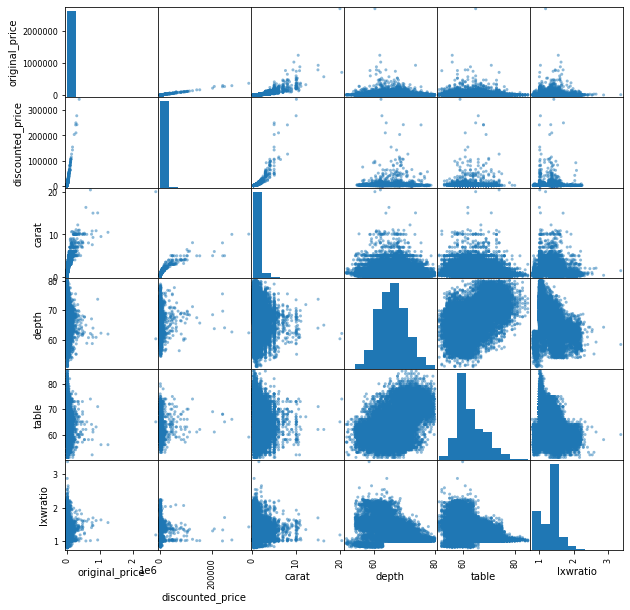

In [86]:
pd.plotting.scatter_matrix(df, figsize = (10,10));

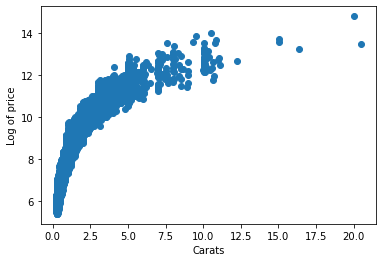

In [52]:
fig,ax = plt.subplots()
ax.scatter(df.carat,np.log(df.original_price))
ax.set_xlabel('Carats')
ax.set_ylabel('Log of price');

In [104]:
df.corr()

,original_price,discounted_price,carat,depth,table,lxwratio
original_price,1.000000,0.996545,0.750373,-0.002017,0.008501,-0.021978
discounted_price,0.996545,1.000000,0.821733,0.022069,0.024058,-0.042353
carat,0.750373,0.821733,1.000000,0.049386,0.013103,-0.109959
depth,-0.002017,0.022069,0.049386,1.000000,0.593589,-0.556816
table,0.008501,0.024058,0.013103,0.593589,1.000000,-0.448713
lxwratio,-0.021978,-0.042353,-0.109959,-0.556816,-0.448713,1.000000


need to remove discounted price since we are trying to predict original price or else there might be data leakage - model will have the information you are trying to predict

In [106]:
df.drop('discounted_price',axis =1,inplace = True)

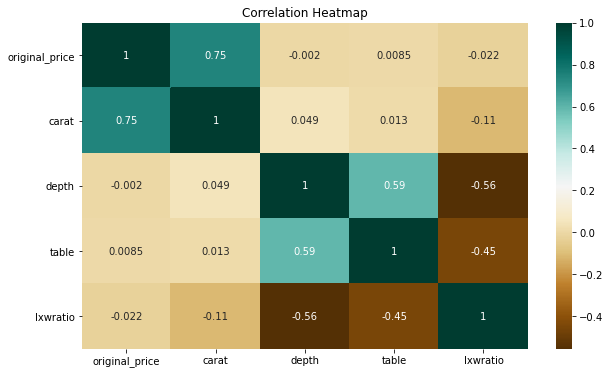

In [107]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df.corr(),cmap = 'BrBG',annot = True)
heatmap.set_title('Correlation Heatmap');

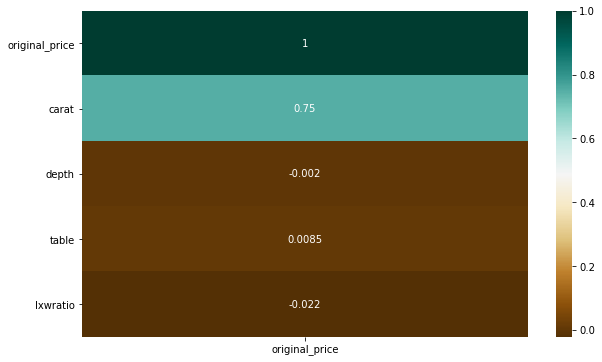

In [108]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr()[['original_price']],cmap = 'BrBG',annot=True);

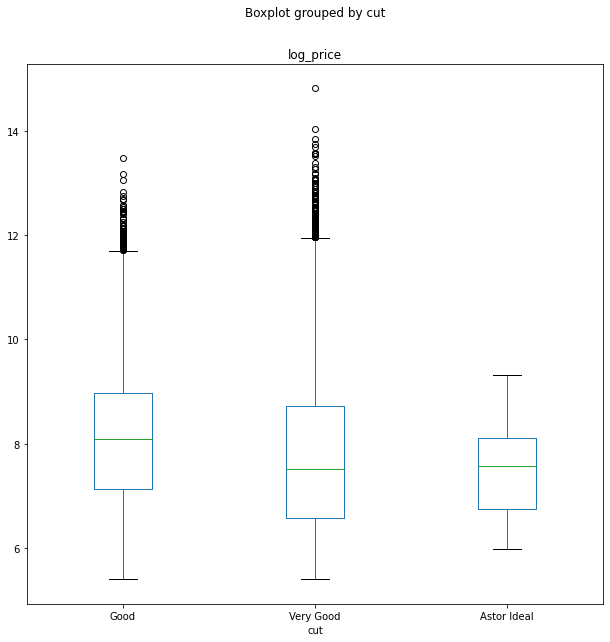

In [128]:
df['log_price'] = np.log(df['original_price'])
boxplot = df.boxplot(column=['log_price'],by='cut', figsize = (10,10), positions = [2,0,1] ,grid=False)

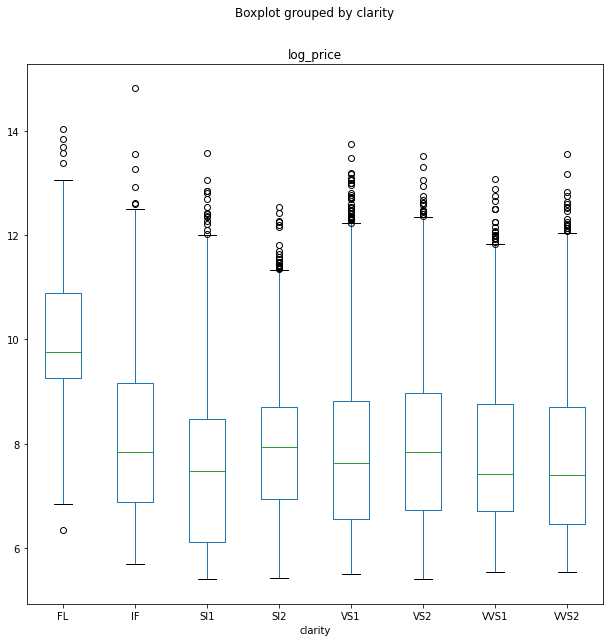

In [149]:
df['log_price'] = np.log(df['original_price'])
boxplot = df.boxplot(column=['log_price'],by='clarity', figsize = (10,10), grid=False)

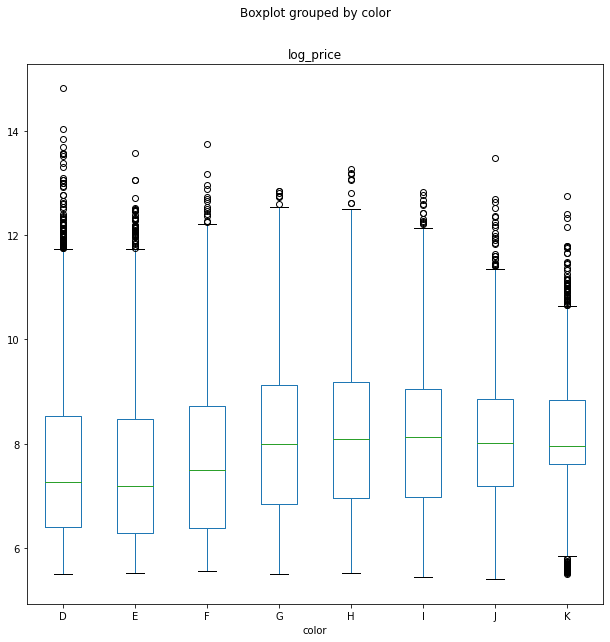

In [156]:
boxplot = df.boxplot(column=['log_price'],by='color', figsize = (10,10), grid=False)